# How Happy were Spotify Users Before and After the COVID-19 Pandemic?
#### *Collaborators: Jun Park, Allan Huang, Swasti Jain*

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import main

valence_diff = main.valence_change()
valences_all = main.overall_valence()
average_valences = valences_all[0]
overall_valence = valences_all[1]

## 1.0 Introduction


### 1.1 Research Question
How does the COVID 19 Pandemic correlate with the happiness levels of people's music preferences?

### 1.2 Background and Importance

As the range of the variety of music grows over time, research has shown how an individual's music preferences correlate to their mood. To fully utilize this correlation, our project aims to call from the Spotify API to analyze a user's overall mood for a year, specfically the year 2020: the start of the COVID-19 Pandemic. 

As a global collective, we all experienced some effect of the COVID-19 pandemic. Due to the stay-at-home quarantine and thus the lack of social engagement, many individuals' mental wellbeing declined. This made us wonder if the global pandemic, starting in 2020, would have an impact on the music choices of Spotify listeners by looking at their music trends over the past four years.

At the end of every year, Spotify provides the user a playlist called "Spotify Wrapped", which consists of the user's top songs from the past year. The Spotify API also provides audio features for each track, such as "danceability","liveness","speechiness",etc. Among these features, our team uses the "valence" metric, which represents the musical postiviness conveyed by a track. 

According to Spotify, "Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sounds more negative (e.g. sad, depressed, angry). Therefore, through analyzing the valence values across a user's "Spotify Wrapped" from years 2019 to 2022, our project will observe whether a significant change of happiness is apparent during the periods before and after COVID-19.


## 2.0 Methodology

### 2.1 Data Acquisition

Spotify generates these "Spotify Wrapped" playlists privately for each user; therefore, to collect data for these playlists, we needed users to willingly change their private playlists into a public format.

Therefore, we sent out a survey for people to volunteer for our study. We asked a broad range of young adults (ages 16-25) to submit a public copy of their Top 100 playlist from the past four years, from 2019 to 2022. 


This survey, a Google form, included a pictorial tutorial of how to find and create a copy of the playlists. Unfortunately this proved to be suboptimal as there were many steps that were easy to mess up.

To address these problems we did two things. We first implemented a link validation function to make sure the url’s we scraped were valid (more on this later). Secondly we held an in-person event where we not only were able to help participants submit their data correctly but also gain more data. 

### 2.2 Data Processing 

Our data were playlist link strings stored in a Google Sheet spreadsheet. We decided against saving our data as a `.csv` , so the participants’ personal data remains protected within the private-access spreadsheet. 

Our first section of data processing was using the Google Sheets API to scrape the spreadsheet for the relevant information. 

As aforementioned, we encountered participants submitting invalid links. For this reason we created a function that would check whether the url was a valid and accessible Spotify link. 

We then created a dictionary in which the keys were each year (i.e. 2019, 2020, 2021, 2022), and the values were lists of the viable playlist links. The non-viable links were replaced with empty strings and thus our data was cleared of inconsistencies. 

The next section of our data processing was to use the Spotify API to scrape the individual songs from each playlist and find the average valence per user each year. 

To clarify, the steps were as such:

* Extract the Playlist URI from the submitted Spotify Playlist link

* Find the Track ID for each song in the playlist

* Run the Track IDs through the Spotify API to call back the valence values

* Use function to find the average valence for a playlist

* Afterwards, use these average valences for our interpretations


### 2.3 Data Storage and Processing

## 3.0 Results


Text(0.5, 0.98, 'Valence Averages for Each Year from 2019-2022')

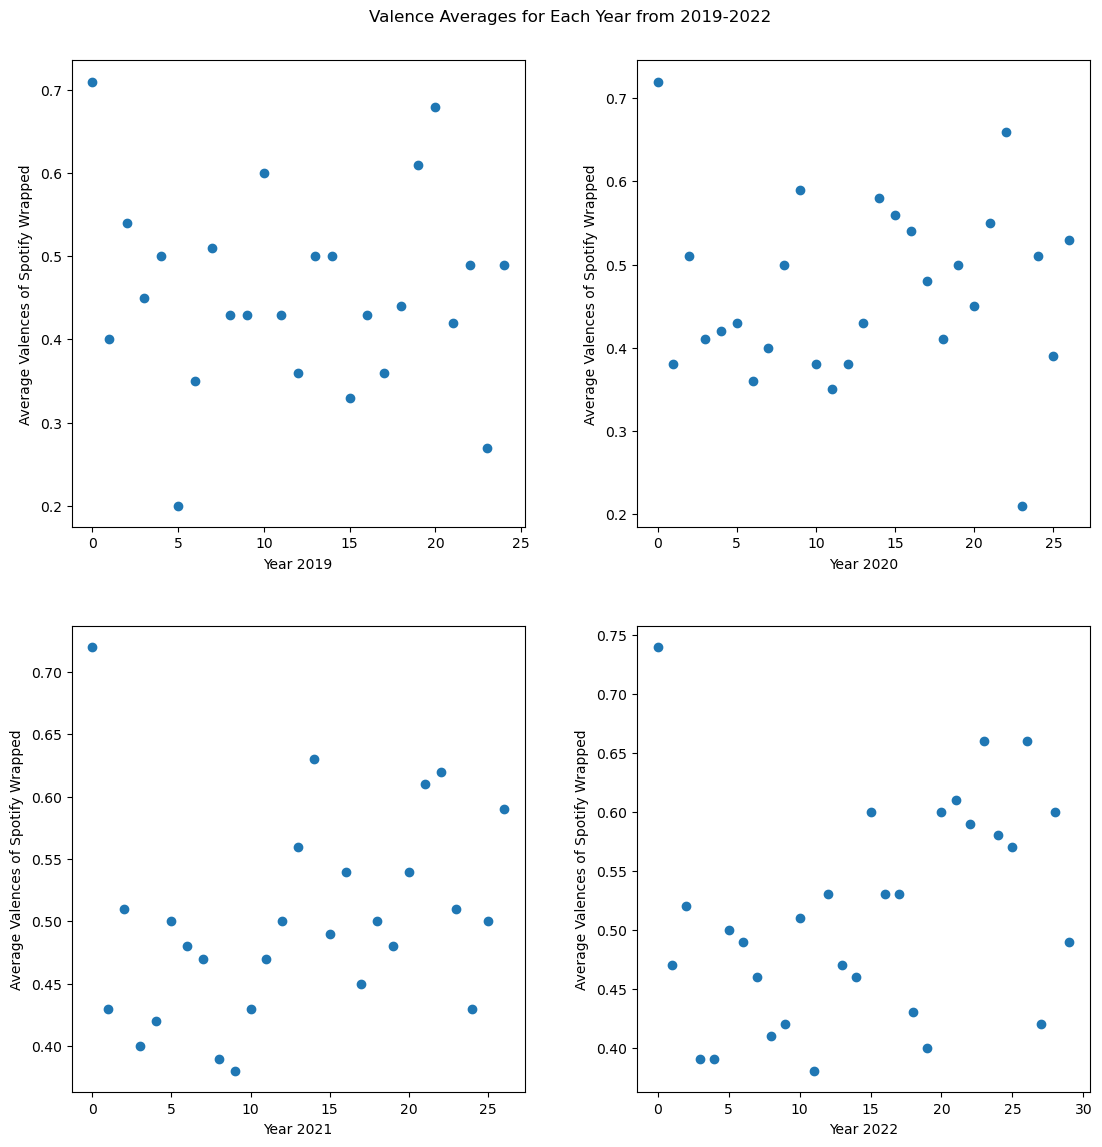

In [60]:

average_19 = pd.DataFrame(average_valences["2019"], columns = ["2019"])
average_20 = pd.DataFrame(average_valences["2020"], columns = ["2020"])
average_21 = pd.DataFrame(average_valences["2021"], columns = ["2021"])
average_22 = pd.DataFrame(average_valences["2022"], columns = ["2022"])

# Set Subplots 
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)

# Plotting the playlist valence average over all users in 2019
axes[0][0].scatter(x = range(len(average_19)), y = average_19)
axes[0][0].set_xlabel('Year 2019', labelpad = 5)
axes[0][0].set_ylabel('Average Valences of Spotify Wrapped', labelpad = 5)

# Plotting the playlist valence average over all users in 2020
axes[0][1].scatter(x = range(len(average_20)), y = average_20)
axes[0][1].set_xlabel('Year 2020', labelpad = 5)
axes[0][1].set_ylabel('Average Valences of Spotify Wrapped', labelpad = 5)


# Plotting the playlist valence average over all users in 2021
axes[1][0].scatter(x = range(len(average_21)), y = average_21)
axes[1][0].set_xlabel('Year 2021', labelpad = 5)
axes[1][0].set_ylabel('Average Valences of Spotify Wrapped', labelpad = 5)


# Plotting the playlist valence average over all users in 2022
axes[1][1].scatter(x = range(len(average_22)), y = average_22)
axes[1][1].set_xlabel('Year 2022', labelpad = 5)
axes[1][1].set_ylabel('Average Valences of Spotify Wrapped', labelpad = 5)

plt.suptitle('Valence Averages for Each Year from 2019-2022')

### 3.1.1 Visualization 1
The graphs above represent the average valences for that year's playlist for each user.

### 3.1.2 Important Takeaways
Our team obeserved the valence averages for each year to see if there are any specific trends for that year. However, we found that the spread is fairly random and unpredictable. Therefore, no clear correlation in between users for that year.



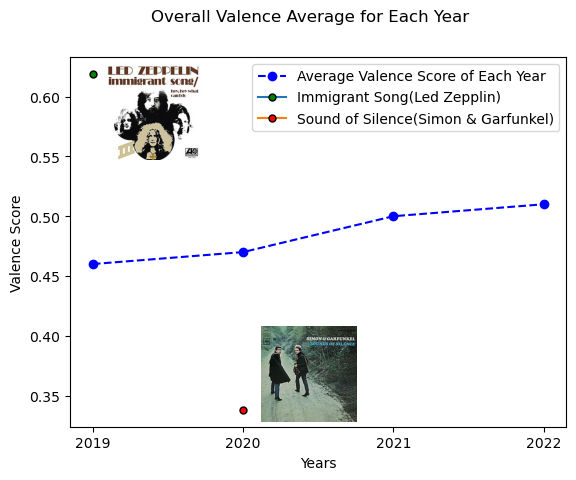

In [59]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

names = list(overall_valence.keys())
values = list(overall_valence.values())

fig = plt.figure()

plt.plot(names, values, '--bo', label='Average Valence Score of Each Year')
plt.xlabel("Years")
plt.ylabel("Valence Score")

plt.plot([0], [0.619], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green", label='Immigrant Song(Led Zepplin)')
plt.plot([1], [0.338], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red", label='Sound of Silence(Simon & Garfunkel)')
plt.legend()

im = plt.imread('/home/redhotchili0909/schoolwork/softdes/projects/mood-of-music/pictures/ledzeppelin.jpg')
im2 = plt.imread('/home/redhotchili0909/schoolwork/softdes/projects/mood-of-music/pictures/simongarfunkel.jpg')
fig.add_axes(rect=[0.18, 0.465, 0.15, 0.4], anchor='NE', zorder=1,)
plt.imshow(im)
plt.axis('off')
fig.add_axes(rect=[0.423, -0.08, 0.15, 0.4], anchor='NE', zorder=1,)
plt.imshow(im2)
plt.axis('off')

plt.suptitle('Overall Valence Average for Each Year')
plt.show()

### 3.2.1 Visualization 2
This graph above represents the average valence across all users for the years between 2019 to 2022.

### 3.2.2 Important Takeaways
Logically we take the average across all users to see if it can indicate a massive spike or decrease in the happiness of each year. We observe that there is an upward trend as the years go by. However, this does not allign with our research question, since, based on our assumption, we should see a decrease in valences during the COVID-19 years.


Text(0.5, 0.98, 'Valence Changes from 2019-2022')

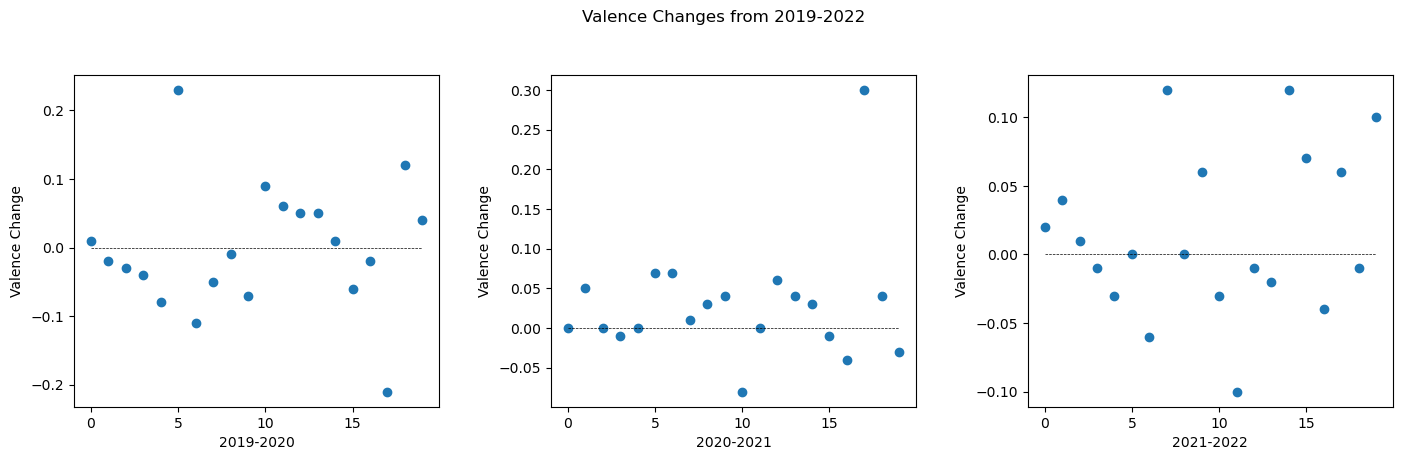

In [52]:

# Indexing and naming each set of ley and values of the dictionary
change_19_20 = pd.DataFrame(valence_diff["2019-2020"], columns = ["2019 ~ 2020"])
change_20_21 = pd.DataFrame(valence_diff["2020-2021"], columns = ["2020 ~ 2021"])
change_21_22 = pd.DataFrame(valence_diff["2021-2022"], columns = ["2021 ~ 2022"])

# Set Subplots 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=5.0)

# Taking the years (2019-2020) and corresponding columns then graphing them 
axs[0].scatter(x = range(len(change_19_20)), y = change_19_20)
axs[0].plot([0, 19], [0, 0], linestyle='dashed', color='black', linewidth=0.5)
axs[0].set_xlabel('2019-2020')
axs[0].set_ylabel('Valence Change', labelpad = 5)

# Taking the years (2020-2021) and corresponding columns then graphing them 
axs[1].scatter(x = range(len(change_20_21)), y = change_20_21)
axs[1].plot([0, 19], [0, 0], linestyle='dashed', color='black', linewidth=0.5)
axs[1].set_xlabel('2020-2021')
axs[1].set_ylabel('Valence Change', labelpad = 5)


# Taking the years (2021-2022) and corresponding columns then graphing them 
axs[2].scatter(x = range(len(change_21_22)), y = change_21_22)
axs[2].plot([0, 19], [0, 0], linestyle='dashed', color='black', linewidth=0.5)
axs[2].set_xlabel('2021-2022')
axs[2].set_ylabel('Valence Change', labelpad = 5)

plt.suptitle('Valence Changes from 2019-2022')

### 3.3.1 Visualization 3

The graphs above represent the change in valences for each user for consecutive years. 


### 3.3.2 Important Takeaways

Our team observed that as users transitioned from 2019 to 2020, the COVID year, many users' average valences decreased. During the transition from 2020 to 2021, users' average valence increased, which shows that as users were moving out of the COVID years, their valences increased. Lastly, the transition from 2021 to 2022 displays a more diverse variety of valence changes.

## 4.0 Conclusion

When comparing the differences in the users’ valence between each year, we saw that the music happiness was low before the pandemic year and improved afterwards. The difference between 2021 and 2022, both post-pandemic years, displayed a random and sporadic distribution. Thus indicating that the pandemic year was distinct. Further past years’ data would be necessary to confirm this. 

Finding an association between a person’s music happiness and their mental wellbeing could be extremely helpful. For people who are struggling with poor mental health, listening to a prescribed playlist of more upbeat music or tracking what a patient is listening to over time could be helpful tools in monitoring and improving the mental wellbeing of individuals. 

Additionally, through this project, we learned how to distinguish what data is able to be publicly used and what data should remain private.
Different data structures have different advantages and disadvantages. Using a dictionary data structure worked out well enough but it certainly limited what we were able to do with our data. 

While Spotify’s valence factor measures the happiness of the music there are other important factors we could try accommodating for. For example the energy, loudness, and danceability are all metrics provided by Spotify we could incorporate into our analysis of how “happy” a song is. 

Additionally when talking to participants, some self-reported levels of higher happiness than their valence average for that year indicated. While we were able to find a correlation, we cannot confirm whether the pandemic was the cause for the perceived lowered valence values. 
